# Geocoding (Mapping your Address)

![gcod1](images/gcod1.jpg)

## Where do you find Addresses

1. When you are posting something.

![gcod2](images/gcod2.jpg)

2. When you are using GPS (Driving to a new place)

![gcod3](images/gcod3.jpg)

3. When you are using google maps

![gcod4](images/gcod4.png)

4. When you are using social media platforms (Twitter, Facebook)

![gcod5](images/gcod5.jpg)

5. If you are working in a hospital facility you might have interacted with the EHR

![gcod6](images/gcod6.jpg)

6. You would have seen addresses in Flyers

![gcod7](images/gcod7.jpg)

7. Or even in newspapers

![gcod8](images/gcod8.png)

Can you think about other sources of addresses that you have encountered before???

## Are Addresses directly Mappable?

Let's try it out!!

1. Download your data.

Download your address data for the Zip code 44106 from https://cwru.box.com/s/67xgaxniymjuboabxt2m2xf1mr4sj4aa

2. Load the CSV data to QGIS (we have done this in the last chapter) 

![geocode](images/geocode.png)

But unfortunately we don't have any columns that have coordinates. So we have to select *No geometry* option radio button

![geocode1](images/geocode1.png)

And when we add it, there is just a table in the layer window and the addresses are not mapped. 

![geocode2](images/geocode2.png)

So how do we map these addresses (Hint!!!The name of this chapter)

## What is geocoding?

>Geocoding is the process of **transforming a description of a location—such as a pair of coordinates, an address, or a name of a place—to a location on the earth's surface**. 

Ok let's look into a more simpler definition. 

> Geocoding takes an **address as input, then translates it to a location on a map**. In short, it **changes an address to lat long coordinates (latitude and longitude)**.

![gcod9](images/gcod9.png)

## What are geocodes?

> Geocodes are a **set of latitude and longitude coordinates of a physical location**.


## Types of Geographic Location Descriptions that can be geocoded

1. Addresses

This is the most common source of input for geocoding. 

12471 Cedar Rd, Cleveland Heights, Ohio 44106

2. Place Names

Place Names are hard to resolve and hence hard to geocode. Most of the current geocoders doesnot handle place names better. However geocoding services provided by vendors such as Google, Bing, and Baidu are very good at handling place names. 

The Eiffel Tower

Now let's get our hand dirty!!

## Time to Geocode

For geocoding  in QGIS we would need a plugin called MMQGIS (its a onetime installation). 

1. Install MMQGIS plugin (this is a onetime installation)

Select the plugin drop down from the menu bar and select the "Manage and Install Plugins" option

![geocode3](images/geocode3.png)

Search for MMQGIS and install it. 

![geocode4](images/geocode4.png)

Now you should see the MMQGIS drop down in the menu bar

![geocode5](images/geocode5.png)

2. Select Geocode and Geocode CSV with webservice from MMQGIS

![geocode6](images/geocode6.png)

3. Select the CSV file that we have loaded earlier and populate the necessary fields

We are using OpenStreetMap as its free (US Census Bureau is also free). You can also select the location and the filename you want for the output. The output will be a shapefile for the ones that are successfully geocoded and a csv file for the ones that are not geocoded.

![geocode7](images/geocode7.PNG)

4. Click on Apply and then wait for geocoding to finish. 

You can see the total number of addresses that needs to be geocoded and the ones that are successfully geocoded in the progress bar. In our case there were 99 addresses out of which 64 were geocoded to a location (64%) (which is very poor!!) and 35 addresses didn't have a valid geocode. The one's that are not geocoded are saved to a new csv file which can be further investigated up on. 

![geocode8](images/geocode8.PNG)

Once the geocoding is completed there will be a new layer in our layer window and our map layer will have the geocoded points

![geocode9](images/geocode9.PNG)

We can try with census bureau geocoder too which should geocode 96 out of 99 locations (96%). 

You can open the attribute table for the new layer that was created and can explore the various fields that were added as result of the geocoding. 

Yay!!!!!that's our first venture into geocoding.....

But are we satisfied  with our results. What is the additional thing we need to be aware of. 

## Accuracy

One of the key metric for assessing the result of a geocoding task is "Accuracy". If you examine the attribute table of the new layer that was created as a result of the geocoding task you could see that there is no attribute that shows the geocoding accuracy. 

To highlight the issue lets see an example

Download the data from https://cwru.box.com/s/li6p5m9ta9yt56kot3ici2lexgx7acd5

It has 4 addresses. The real address is 2439 Overlook Rd, Cleveland, OH

The address with id 1 is the right address, while address corresponding to id 2 (243999 Overlook Rd Overlook Rd) doesn't exist. Address for id 3 has a typo (2439 Ovrlook Rd), while the address for id 4 (2439 Overlook Rd, Kent) has the wrong city and hence is non-existent.

If you run geocoding using Open Street geocoding service, you will find that two locations are geocoded. If you open the attribute table for the geocode you will find that while Address 2439 Overlook Rd, Cleveland, OH is correctly matched, the address 243999 Overlook Rd Overlook Rd is matched to Overlook Rd, Cleveland, OH (which is a street segment). The difference can be noticed in the "category" and "type" columns too. While the correct address has category as "place" and type as "house", the supposedly wrong address has category as "highway" and type as "residential". These columns could be a potential filter to weed out the inaccurate results. 
 
![geocode10](images/geocode10.PNG)

If you run geocoding with Census Bureau, again you will have two locations geocoded. But this time one of the result is for the misspelled address (2439 Ovrlook Rd). In this case Census Bureau geocoding has rightly identified the misspelled address (2439 Ovrlook Rd) as 2439 Overlook Rd (from the "matchedAdd" column), which is actually great!!. 

![geocode11](images/geocode11.PNG)


This simple experiment shows some interesting facts about accuracy of geocoders

1. Geocoding results vary with geocoding services.

2. Data entry errors such as typos are much efficiently handled by some geocoders than others.

3. Without a metric for accuracy it would be foolhardy to completely rely on geocoding results. The geocoders can silently generate inaccurate results without any warnings. For example, geocoders can assign the geocode of an address to a street/zip or even a state centroid without any warning. 

## Various levels of Geocode

A coordinate can be assigned to an address based on various level of information a geocoder has

1. Rooftop Geocodes

It is the most accurate geocode type and provides the exact location for the address.

![gcod10](images/gcod10.png)

2. Parcel Centroid Geocodes

In this case the address is assigned to the centroid of the parcel boundary for the property. *"A 'parcel', 'lot', or 'tract' is a piece of land (or 'real property') with defined boundaries. "*. This is also relatively accurate. 

![gcod11](images/gcod11.png)

3. Interpolated Geocodes

Interpolation methods uses information about address number ranges to estimate the position of a numbered address. For example there is no direct address match for the location 1149 38th St, Sacramento, California, 95816. But if the geocoder has the street segment (which is a line segment) geometry with it and if the address range of 38 street starts from 1001 and ends at 1299, the geocoder will assign the center point of the street line as the geocode for 1149 38th St, Sacramento, California, 95816.

Is that accurate???. Well it depends up on what level of accuracy you are looking for.

![gcod12](images/gcod12.png)

4. Zip Geocode

In this type of geocode, the address is assigned to the centroid of Zip code polygon that it resides in. For example if the geocoder is not able to geocode the address 2439 Overlook Rd, Cleveland,Ohio,44106, it can assign the address to the centroid of the Zip code polygon for 44106. This type of approach has a very low accuracy and users should be aware of such assignments.

![gcod13](images/gcod13.png)

## Geocoding Pitfalls and Remedies

As we have seen, Geocoding Accuracy is arbitrary. There is no one answer for how accurate geocoding is because there are several factors that you need to consider before you can accurately answer this question.

The level of geocoding accuracy you need depends up on many factors,

1. If you want to identify clusters of a particular infectious disease and notify first responders, then you need good geocoding accuracy. You also want to make sure that you don't loose much of valuable information by tossing away records that are not geocoded. 

A problem with geocodes such as zip centroid is that it can generate "spurious clusters" during analysis. For example if a geocoder is matching many addresses to a zip code centroid for the zip code 44106, then there would be a sudden increase of cases at the zip code centroid which will raise a false alarm (such issues are very common in EHR databases).


2. Use of **remote geocoding webservices can be a violation of privacy rules for health data.**

If you are using remote webservices (which sends request via internet) for geocoding, you are sending health data (which is supposed to highly confidential) over the wire (internet). The organization that is providing the geocoding service can collect the addresses as well as other private information from such requests. 

The work around will be to use standalone geocoder, where the address database sits locally or at a secure research location. Such kind of standalone geocoders are provided by ArcGIS (needs license) or you can build your own geocoding service using a readily available data source like the Tiger Line files and a database like PostgreSQL  


3. Tossing records that doesn't have geocode when data is at a premium.

If you are looking at a rather new and complex disease that is spread only among a few people, you would not want to toss out records that doesn't have a geocode, rather you could try multiple geocoders (depending up on your budget) to extract out the geocode. 


4. If you just want to aggregate the addresses at zip code level and if the addresses already have a zip code number, you don't even need to perfrom the relatively costly geocoding. 

You can directly extract out the zip code number from the address and at a later point merge it to a zip code polygon that has the zip code number as its attribute ( we will look into such table based merges in the upcoming sessions). 


A quick look at how we can geocode using Python (for Pythonista)

In [1]:
import geopandas as gpd
#the addresses to geocode
toGeocode=gpd.read_file(r'../sharedData/Address_Zip_44106_small.csv')
# concatenate the fields together
toGeocode['fullAddress'] = toGeocode['Address']+','+toGeocode['CITY']+','+toGeocode['REGION']+','+toGeocode['POSTCODE'].astype(str)
#get the geocoded address as geodataframe
geoCoded = gpd.tools.geocode(toGeocode.fullAddress)

In [2]:
print (geoCoded)

                      geometry  \
0   POINT (-81.59933 41.50950)   
1   POINT (-81.59578 41.49795)   
2   POINT (-81.59933 41.50950)   
3   POINT (-81.59933 41.50950)   
4   POINT (-81.60100 41.49654)   
..                         ...   
94  POINT (-81.60241 41.51422)   
95  POINT (-81.60241 41.51422)   
96  POINT (-81.60241 41.51422)   
97  POINT (-81.60070 41.50139)   
98  POINT (-81.60532 41.50000)   

                                              address  
0   East 120th Street, 44106, Cleveland, Ohio, Uni...  
1   Delaware Drive, 44106, Cleveland Heights, Ohio...  
2   East 120th Street, 44106, Cleveland, Ohio, Uni...  
3   East 120th Street, 44106, Cleveland, Ohio, Uni...  
4   Denton Drive, 44106, Cleveland Heights, Ohio, ...  
..                                                ...  
94  East 118th Street, 44106, Cleveland, Ohio, Uni...  
95  East 118th Street, 44106, Cleveland, Ohio, Uni...  
96  East 118th Street, 44106, Cleveland, Ohio, Uni...  
97  Case Western Reserve Univer

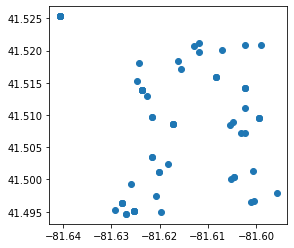

In [3]:
geoCoded.plot();

# Coordinate System and Projections

![gcod14](images/gcod14.png)

## The shape of earth

Is it a <h4>Circle???</h4>

![gcod15](images/gcod15.jpg)

Or is it a <h4>Sphere???</h4>

![gcod16](images/gcod16.jpg)

It's actually <h4>Oblate Spheroid</h4> <b>bulges at equator and squashed at poles</b>

![gcod17](images/gcod17.jpg)


But for easing mathematical formulations scientists have represented Earth using an Ellipsoidal model. 

![gcod18](images/gcod18.png)

## Latitude and Longitude

Latitude lines run east-west and are parallel to each other. If you go north, latitude values increase. Finally, latitude values (Y-values) range between -90 and +90 degrees.

Longitude lines run north-south. They converge at the poles. And its X-coordinates are between -180 and +180 degrees.


![gcod19](images/gcod19.png)

## What are Map Projections?

While it's best to represent earth as a sphere, flattening them out to two dimensions is more convenient for map making and measuring distances.

![gcod20](images/gcod20.png)

**So map projections are used to flatten out the representation of earth to two dimensions.**

But there is a catch, **you can't represent the earth surface in two dimensions with out any distortions (in distance, direction, scale, and area)**. 


An easy way to visualize a map projection is to think of peeling an orange and flattening it out. 

![gcod21](images/gcod21.png)

## Types of Map Projections

Map projections take developable surfaces such as cylinders, cones, and planes.

### Conic Projections

When you place a cone on the Earth and unwrap it, this results in a conic projection. 

![gcod22](images/gcod22.png)

**Good for mapping long east-west regions because distortion is constant along common parallels**.

Scale is preserved while the area is distorted. 

In general, distortion increases north and south of the standard parallel. **Distortion at the poles is so extreme that many maps that use conic projections remove the polar regions**. 

![gcod23](images/gcod23.png)

Some commonly used conic projections include Albers Equal Area Conic and the Lambert Conformal Conic 

### Cylindrical Projections

When you place a cylinder around a globe and unravel it, you get the cylindrical projection.

![gcod24](images/gcod24.png)

In cylindrical projections the north is always facing up (which is good!!). It greatly inflates the artic region. 

![gcod25](images/gcod25.png)

Some common examples of cylindrical projections include Mercator, Miller, and many of the State Plane Coordinate System. 

A cool video on the issues of Projection

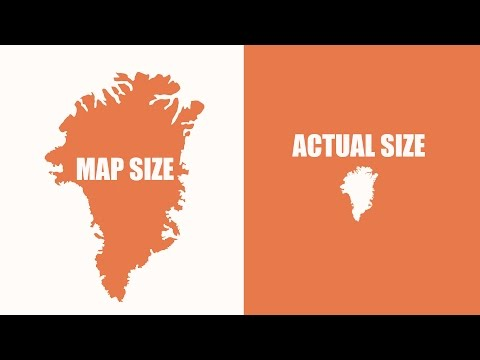

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('KUF_Ckv8HbE')

### Map Projections and Coordinate Systems (Real Examples)

1. **Geographical Coordinates** (No Projection) Latitude and Longitude

Load up the csv file https://cwru.box.com/s/e61anmbcxhits2oisk6ir5mnrhlc621i   in QGIS

Right click on the layer and select properties and then select information. Check coordinate reference system and you can see that the reference system is EPSG:4326 - WGS 84 and units in Geographic (uses latitude and longitude for coordinates) (degrees)

![gcod26](images/gcod26.png)


2. **Projected Coordinates**

Load up the shapefile https://cwru.box.com/s/lex859rjwhu2g4v0gj5cp51cvc15j8jw in QGIS

Again Right click on the layer and check the coordinate reference system

![gcod27](images/gcod27.png)

This time you will see that the reference system is EPSG:3857 Psuedo Mercator and the units are **in meters**. 

Coordinate systems and projections are very important when you are working with multiple layers. When using multiple layers for analysis the coordinate system for the layers should be the same. For methods such as spatial interpolation and Kernel Density estimate (we will cover in later chapters), its better to use projected coordinate system. 

Let us open the files in Python and check the reference system

In [21]:
import geopandas as gpd
data = gpd.read_file('../sharedData/earthquake_above_4.5_projected/earthquake_above_4.5_projected.shp')
print (data.crs)

epsg:3857


3. Converting between coordinate system

Open the shapefile https://cwru.box.com/s/lex859rjwhu2g4v0gj5cp51cvc15j8jw in QGIS

Select Vector -> Data Management Tools -> Reproject Layer

Select Target CRS as 4326  (so we are Re-projecting from 3857 to 4326)

![gcod28](images/gcod28.png)

Click on run, and a new file will be created (with a name Reprojected)

You can check the projected coordinate system for the file and verify whether its the Geographic Coordinate System (4326)

Now let's try this in Python

In [18]:
import geopandas as gpd
data = gpd.read_file('../sharedData/earthquake_above_4.5_projected/earthquake_above_4.5_projected.shp')
print (data.crs)
dataNew = data.to_crs('EPSG:4326')
print (dataNew.crs)

epsg:3857
EPSG:4326


<AxesSubplot:>

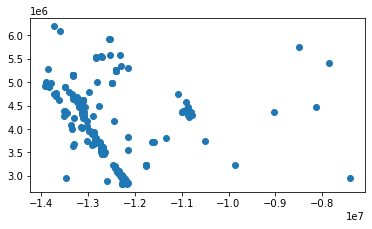

In [19]:
data.plot()

<AxesSubplot:>

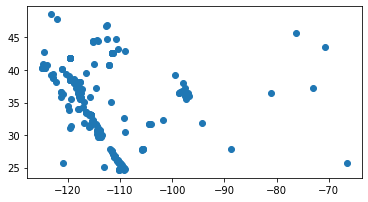

In [20]:
dataNew.plot()